# An original construction of $H_n$ with Tails

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from fractal_functions import *


plot_options = {'edge_labels': False,
 'vertex_size': 12,
 'vertex_color': 'black',
 'vertex_labels': False,
 'edge_color': 'black',
 'figsize': 12,
 'edge_label_fontsize': 10}


Resistance Distance Analysis Summary
Matrix size: (2190, 2190)
Min resistance: 0.000000
Max resistance: 0.950671
Mean resistance: 0.441208
Std dev: 0.172903
Median: 0.482284
25th percentile: 0.300592
50th percentile: 0.482284
75th percentile: 0.571577
90th percentile: 0.646987
95th percentile: 0.690231
99th percentile: 0.765878



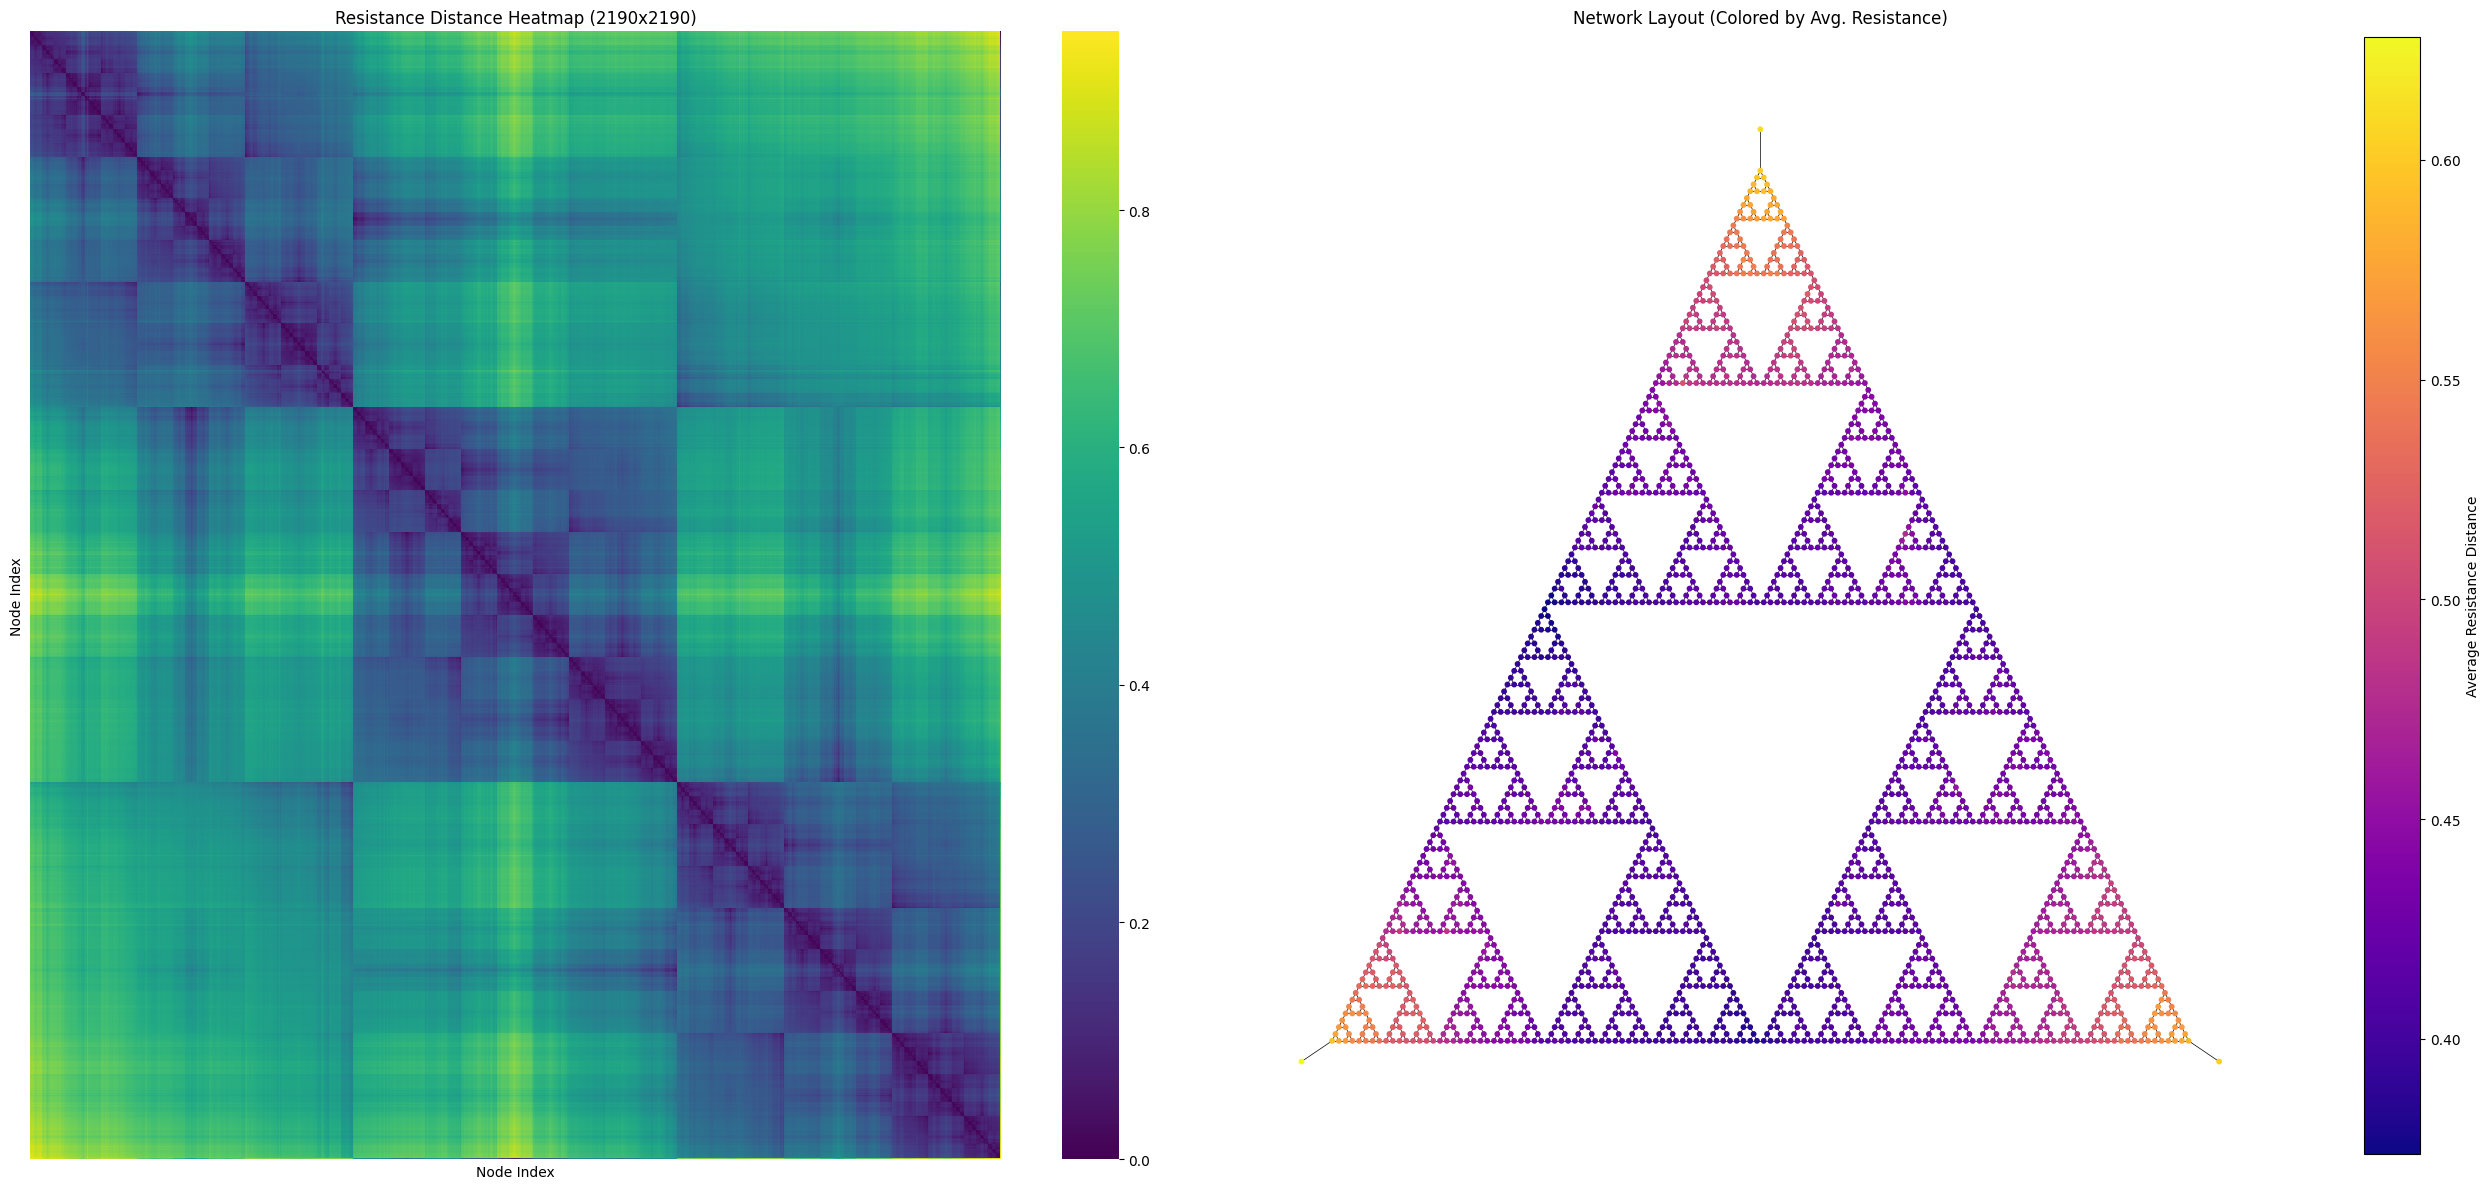

In [3]:
n = 7
g = add_random_weights(hanoi_t(n), n)
res_g = compute_resistance_matrix(g)
resistance_analysis_summary(res_g)
visualize_resistance_methods(g, res_g, list(g.nodes()), '')

{((0, 0, 0), (0, 0, 2)): 'r001', ((0, 0, 0), (0, 0, 1)): 'r002', ((0, 0, 0), 'tail_0'): '$\\tilde{r}_{0}$', ((0, 0, 1), (0, 1, 0)): 'r02', ((0, 0, 1), (0, 0, 2)): 'r000', ((0, 0, 2), (0, 2, 0)): 'r01', ((0, 1, 0), (0, 1, 2)): 'r011', ((0, 1, 0), (0, 1, 1)): 'r012', ((0, 1, 1), (1, 0, 0)): 'r2', ((0, 1, 1), (0, 1, 2)): 'r010', ((0, 1, 2), (0, 2, 1)): 'r00', ((0, 2, 0), (0, 2, 2)): 'r021', ((0, 2, 0), (0, 2, 1)): 'r022', ((0, 2, 1), (0, 2, 2)): 'r020', ((0, 2, 2), (2, 0, 0)): 'r1', ((1, 0, 0), (1, 0, 2)): 'r101', ((1, 0, 0), (1, 0, 1)): 'r102', ((1, 0, 1), (1, 1, 0)): 'r12', ((1, 0, 1), (1, 0, 2)): 'r100', ((1, 0, 2), (1, 2, 0)): 'r11', ((1, 1, 0), (1, 1, 2)): 'r111', ((1, 1, 0), (1, 1, 1)): 'r112', ((1, 1, 1), (1, 1, 2)): 'r110', ((1, 1, 1), 'tail_1'): '$\\tilde{r}_{1}$', ((1, 1, 2), (1, 2, 1)): 'r10', ((1, 2, 0), (1, 2, 2)): 'r121', ((1, 2, 0), (1, 2, 1)): 'r122', ((1, 2, 1), (1, 2, 2)): 'r120', ((1, 2, 2), (2, 1, 1)): 'r0', ((2, 0, 0), (2, 0, 2)): 'r201', ((2, 0, 0), (2, 0, 1)): 'r202

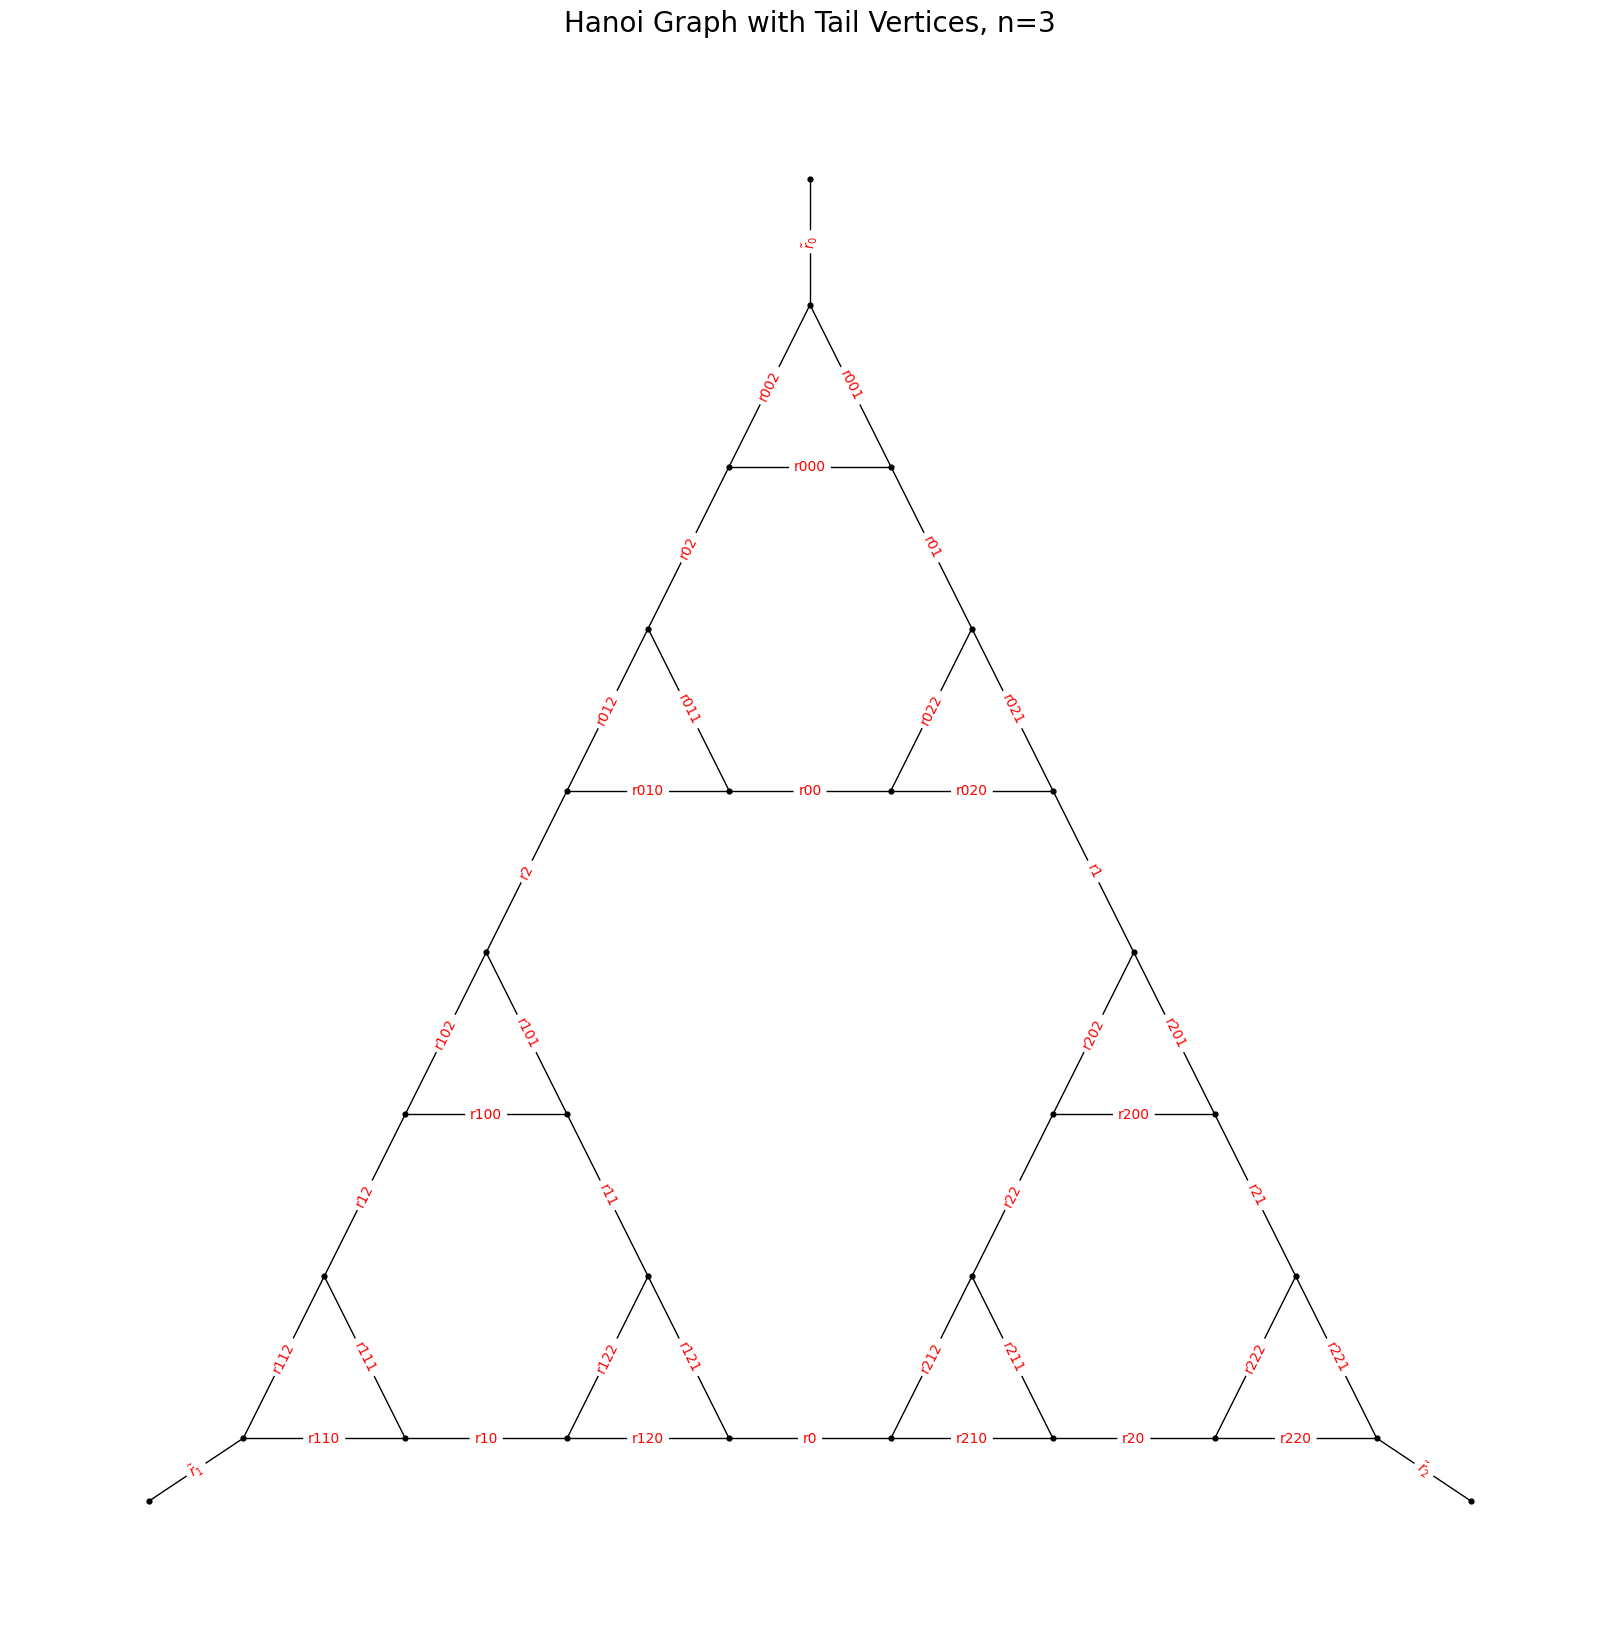

In [5]:
n = 3
hn = hanoi_t(n)

plt.figure(figsize=(16, 16))

# Use the .pos attribute stored in the graph object
pos = get_pos(hn)
edge_labels = nx.get_edge_attributes(hn, 'label')
print(edge_labels)

nx.draw(hn, pos,
        with_labels=False,
        node_size=12,
        node_color='black',
        font_size=8)

nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=edge_labels,
                             font_color='red',
                             font_size=10)

plt.title(f'Hanoi Graph with Tail Vertices, n={n}', size=20)
plt.show()

# An attempt to compute $\varphi_n^j$ for "bridge edges" of subscript length $n-1$

* Pick edge $r_x$ of index length $n-1$ at level $n$. 
* Search edge list to find the two nodes that $r_x$ connects
* Get all delta edges from said nodes (6 edges)
* Apply $\varphi_n^i$ to 7 edges ($r_x$ + 6 delta edges)
* Assign mapping to $r_x$ at level $n-1$.

For these purposes we need the edge labels generated by **hanoi_t** to be sagemath variables. Let us define a new hanoi function with this in mind (this will be the only difference)

In [ ]:
def hanoi_t_symbolic(n):
    # 1. Initialize a NetworkX Graph object.
    elements, G = {0, 1, 2}, nx.Graph()
    
    # Vertex generation and addition are standard NetworkX operations.
    vertices = list(itertools.product(elements, repeat=n))
    G.add_nodes_from(vertices)

    # --- Add and Label the "Bridge" Edges ---
    m = n
    bridge_edges = [list(itertools.product(elements, repeat=M)) for M in range(1, m + 1)]
    for edge_list in bridge_edges:
        for I_m in edge_list:
            m_len, prefix = len(I_m), I_m[:-1] if len(I_m) > 1 else ()
            i = I_m[-1]
            j, k = [e for e in elements if e != i]
            suffix_len = n - len(prefix)

            if suffix_len > 0:
                v1 = prefix + tuple([j] + [k] * (suffix_len - 1))
                v2 = prefix + tuple([k] + [j] * (suffix_len - 1))
                
                # --- This is the key change for bridge edges ---
                # Step 1: Create the name of the variable as a Python string.
                # e.g., for I_m = (0, 1, 2), var_name becomes "r012"
                var_name = f'r{"".join(map(str, I_m))}'
                
                # Step 2: Use Sage's global `var()` function to create a symbolic variable.
                symbolic_label = var(var_name)
                
                # Step 3: Add the edge to the NetworkX graph, assigning the
                # Sage variable to the 'label' attribute.
                G.add_edge(v1, v2, label=symbolic_label)

    # --- Add and Label the "Tail" Edges ---
    boundary_nodes = {i: (i,) * n for i in range(3)}
    for i, b_node in boundary_nodes.items():
        tail_node = f'tail_{i}'
        
        # --- This is the key change for tail edges ---
        # Step 1: Create the variable name string, e.g., "rtilde0"
        var_name = f'rtilde{i}'
        
        # Step 2: Create the symbolic variable using Sage's `var()`.
        symbolic_label = var(var_name)
        
        # Step 3: Add the edge to the NetworkX graph with the symbolic label.
        G.add_edge(b_node, tail_node, label=symbolic_label)
        
    return G

In [ ]:
def phi_symbolic(G: nx.Graph, target_tuple: tuple):

    var_name = f'r{"".join(map(str, target_tuple))}'
    target_label = var(var_name)

    u1, v1 = [(u, v) for u, v, d in G.edges(data=True) if d['label'] == target_label][0]
    
    u1_adj_edges = [(*u1[:-1], k) for k in elements - {u1[-1]}]
    # print(u1, u1_adj_edges)

    v1_adj_edges = [(*v1[:-1], k) for k in elements - {v1[-1]}]
    # print(v1, v1_adj_edges)

    u1_adj_vars = [var(f'r{"".join(map(str, target_tuple))}') for target_tuple in u1_adj_edges]

    v1_adj_vars = [var(f'r{"".join(map(str, target_tuple))}') for target_tuple in v1_adj_edges]

    R_u1 = sum(u1_adj_vars) + var(f'r{"".join(map(str, u1))}')

    R_v1 = sum(v1_adj_vars) + var(f'r{"".join(map(str, v1))}')

    u1_term = product(u1_adj_vars) / R_u1 
    v1_term = product(v1_adj_vars) / R_v1 

    result = u1_term + v1_term + var(f'r{"".join(map(str, target_tuple))}')

    return result

In [ ]:
# test the algorithm
n=3; target_tuple = (1,0); elements = {0,1,2}
print(latex(phi_symbolic(hanoi_t_symbolic(n), target_tuple)))

r_{10} + \frac{r_{110} r_{111}}{r_{110} + r_{111} + r_{112}} + \frac{r_{120} r_{122}}{r_{120} + r_{121} + r_{122}}


It works! Now we need to implement the same idea, just with the weights themselves rather than the edge labels

In [6]:
def phi(G: nx.Graph, target_tuple: tuple):

    elements = {0,1,2}
    # convert tuple to string
    edge_name = f'r{"".join([str(i) for i in target_tuple])}'
    # get the two vertices joined by the input edge
    for u,v,d in G.edges(data=True):
        if d['label'] == edge_name:
            u1, v1 = u, v 
    # get the two vertices connected to u1 in the delta network. 
    u1_deltas = [(*u1[:-1], k) for k in elements - {u1[-1]}]
    # get the two vertices connected to v1 in the delta network. 
    v1_deltas = [(*v1[:-1], k) for k in elements - {v1[-1]}]
    # print(u1_deltas)
    
    # get the weights (resistances) of the two edges that are connected to u1 but are not the input edge
    # these two edges make up two of the three "delta edges"
    u1_edge_resistances = []
    for vertex in u1_deltas:
        # get the edge labels associated with the delta vertices
        edge_label = f'r{"".join([str(i) for i in vertex])}'
        # print(vertex, edge_label)
        # Loop over the edge data for the u1 and get the appropriate weights
        for u,v,d in G.edges(u1, data=True):
            # print(u,v,d)
            if d['label'] == edge_label:
                res = 1 / d['weight']
                u1_edge_resistances.append(res)
    
    # do the same for v1
    v1_edge_resistances = []
    for vertex in v1_deltas:
        # get the edge labels associated with the delta vertices
        edge_label = f'r{"".join([str(i) for i in vertex])}'
        # Loop over the edge data for the vertex and get the appropriate weights
        for u,v,d in G.edges(v1, data=True):
            if d['label'] == edge_label:
                res = 1 / d['weight']
                v1_edge_resistances.append(res)
    
    # get the resistance associated with the edge opposite the u1 vertex, and do the same for the v1 vertex
    # in the notation, this edge has a label which is the same as the u1 vertex itself. 
    # we know that this edge is opposite to u1, so it joins the other two delta vertices, forming the third and final delta edge.
    u2 = u1_deltas[0]
    edge_label2 = f'r{"".join([str(i) for i in u1])}'
    # print(edge_label2)
    for u,v,d in G.edges(u2, data=True):
        # print(u,v,d)
        if d['label'] == edge_label2:
            opposite_edge_resistance_u1 = 1 / d['weight']

    v2 = v1_deltas[0]
    edge_label3 = f'r{"".join([str(i) for i in v1])}'
    for u,v,d in G.edges(v2, data=True):
        if d['label'] == edge_label3:
            opposite_edge_resistance_v1 = 1 / d['weight']
    
    # finally, get the resistance associated with the input edge
    for u,v,d in G.edges(u1,data=True):
        if d['label'] == edge_name:
            # print(u,v,d)
            input_edge_resistance = 1/d['weight']

    # print(u1_edge_resistances, v1_edge_resistances)
    # print(opposite_edge_resistance_u1, opposite_edge_resistance_v1)
    # print(input_edge_resistance)
    
    # with all the weights, create the mapping
    R_u1 = sum(u1_edge_resistances) + opposite_edge_resistance_u1

    R_v1 = sum(v1_edge_resistances) + opposite_edge_resistance_v1

    u1_term = product(u1_edge_resistances) / R_u1 
    v1_term = product(v1_edge_resistances) / R_v1 

    result = u1_term + v1_term + input_edge_resistance

    return result

In [7]:
from scipy.stats import gaussian_kde

# run the test 1000 times and plot the datapoints
n = 7; lambda_n = ll_vals[n-1]; target_tuple = (0,1,2,0,1,0)
N = 100 
resList = []
for i in range(N):
    G = add_random_weights(hanoi_t(n), n)
    resList.append(phi(G, target_tuple))

# KDE (Kernel Density Estimate)
resArray = np.array(resList)
kde = gaussian_kde(resArray)
x_vals = np.linspace(min(resArray), max(resArray), 100)
y_vals = kde(x_vals)

# Histogram
hist = histogram(resList, bins=75, density=True, color='lightblue', edgecolor='black')

# KDE Plot
kde_plot = list_plot(list(zip(x_vals, y_vals)), plotjoined=True, color='red', thickness=2)

# Mean line
mean_value = np.mean(resArray)
mean_line = line([(mean_value, 0), (mean_value, max(y_vals))], color='green', linestyle='--', thickness=2)

# Combine and Show
print(f'Variance of the sample = {np.var(resArray)}')
print(f'Mean of the sample = {mean_value}')
(hist + kde_plot + mean_line).show()

NameError: name 'product' is not defined

We can get out to $n=7$ with 1000 samples in 1.5 minutes, but 1.45 of those minutes are spent on just graph creation!

This is good news and bad news. The bad news is we need to rewrite the code so that we do not have to generate the entire graph every time.
The good news is that we will likely get to go much higher!

In [8]:
def fast_phi(G: nx.Graph, target_tuple: tuple, n):
    '''In this context we must not create the graph at each level, so we only update the relevant weights'''
    lambda_n = ll_vals[int(n)-1]
    elements = {0,1,2}
    # convert tuple to string
    edge_name = f'r{"".join([str(i) for i in target_tuple])}'
    # get the two vertices joined by the input edge
    for u,v,d in G.edges(data=True):
        if d['label'] == edge_name:
            u1, v1 = u, v 
    # get the two vertices connected to u1 in the delta network. 
    u1_deltas = [(*u1[:-1], k) for k in elements - {u1[-1]}]
    # get the two vertices connected to v1 in the delta network. 
    v1_deltas = [(*v1[:-1], k) for k in elements - {v1[-1]}]

    #================Beginning of update==================================================

    # get all 6 nodes, make a subgraph of 6 nodes, and then loop over said subgraph
    node_list = u1_deltas + v1_deltas + [u1, v1]
    # Generate random numbers for each node
    rand_values = {v: np.random.poisson(lambda_n) + 1 for v in node_list}

    # Loop over edges in the subgraph induced by node_list
    for u, v,d in G.subgraph(node_list).edges(data=True):
        weight = rand_values[u] * rand_values[v]
        G[u][v]['weight'] = weight
    
    #================End of update==================================================

    # get the weights (resistances) of the two edges that are connected to u1 but are not the input edge
    # these two edges make up two of the three "delta edges"
    u1_edge_resistances = []
    for vertex in u1_deltas:
        # get the edge labels associated with the delta vertices
        edge_label = f'r{"".join([str(i) for i in vertex])}'
        # print(vertex, edge_label)
        # Loop over the edge data for the u1 and get the appropriate weights
        for u,v,d in G.edges(u1, data=True):
            # print(u,v,d)
            if d['label'] == edge_label:
                res = 1 / d['weight']
                u1_edge_resistances.append(res)
    
    # do the same for v1
    v1_edge_resistances = []
    for vertex in v1_deltas:
        # get the edge labels associated with the delta vertices
        edge_label = f'r{"".join([str(i) for i in vertex])}'
        # Loop over the edge data for the vertex and get the appropriate weights
        for u,v,d in G.edges(v1, data=True):
            if d['label'] == edge_label:
                res = 1 / d['weight']
                v1_edge_resistances.append(res)
    
    # get the resistance associated with the edge opposite the u1 vertex, and do the same for the v1 vertex
    # in the notation, this edge has a label which is the same as the u1 vertex itself. 
    # we know that this edge is opposite to u1, so it joins the other two delta vertices, forming the third and final delta edge.
    u2 = u1_deltas[0]
    edge_label2 = f'r{"".join([str(i) for i in u1])}'
    # print(edge_label2)
    for u,v,d in G.edges(u2, data=True):
        # print(u,v,d)
        if d['label'] == edge_label2:
            opposite_edge_resistance_u1 = 1 / d['weight']

    v2 = v1_deltas[0]
    edge_label3 = f'r{"".join([str(i) for i in v1])}'
    for u,v,d in G.edges(v2, data=True):
        if d['label'] == edge_label3:
            opposite_edge_resistance_v1 = 1 / d['weight']
    
    # finally, get the resistance associated with the input edge
    for u,v,d in G.edges(u1,data=True):
        if d['label'] == edge_name:
            # print(u,v,d)
            input_edge_resistance = 1/d['weight']

    # print(u1_edge_resistances, v1_edge_resistances)
    # print(opposite_edge_resistance_u1, opposite_edge_resistance_v1)
    # print(input_edge_resistance)
    
    # with all the weights, create the mapping
    R_u1 = sum(u1_edge_resistances) + opposite_edge_resistance_u1

    R_v1 = sum(v1_edge_resistances) + opposite_edge_resistance_v1

    u1_term = product(u1_edge_resistances) / R_u1 
    v1_term = product(v1_edge_resistances) / R_v1 

    result = u1_term + v1_term + input_edge_resistance

    return result


Now lets see if there is a significant speedup!

In [9]:
from scipy.stats import gaussian_kde

# run the test 1000 times and plot the datapoints
n = 7; target_tuple = (0,1,2,0,1,0)
N = 1000
resList = []
G = add_random_weights(hanoi_t(n), n)
for i in range(N):
    resList.append(fast_phi(G, target_tuple, n))

# KDE (Kernel Density Estimate)
resArray = np.array(resList)
kde = gaussian_kde(resArray)
x_vals = np.linspace(min(resArray), max(resArray), 100)
y_vals = kde(x_vals)

# Histogram
hist = histogram(resList, bins=75, density=True, color='lightblue', edgecolor='black')

# KDE Plot
kde_plot = list_plot(list(zip(x_vals, y_vals)), plotjoined=True, color='red', thickness=2)

# Mean line
mean_value = np.mean(resArray)
mean_line = line([(mean_value, 0), (mean_value, max(y_vals))], color='green', linestyle='--', thickness=2)

# Combine and Show
print(f'Variance of the sample = {np.var(resArray)}')
print(f'Mean of the sample = {mean_value}')
(hist + kde_plot + mean_line).show()

NameError: name 'product' is not defined

# Bootstrapping $\operatorname{Var}(\varphi_n)$

In [ ]:
def bootstrap_phi_statistic(num_samples: int, level: int, stat):

    mid_points = []
    lower_bounds = []
    upper_bounds = []

    print("--- Starting Bootstrap Analysis for fast_phi ---")

    # Iterate through graph levels, starting from n=2
    for n in range(2, level + 1):
        print(f"Analyzing graph level n={n}...")

        # Create the graph topology once per level n
        G = add_random_weights(hanoi_t(n), n)

        # List to hold fast_phi results for this level
        phi_results = []

        for _ in range(num_samples):
            # Generate a random target_tuple of length (n-1)
            target_tuple = tuple(np.random.choice([0, 1, 2], size=n - 1))

            # Compute fast_phi for this random target
            phi_val = fast_phi(G, target_tuple, n)
            phi_results.append(phi_val)

        phi_arr = np.array(phi_results)

        # Bootstrap confidence interval for the given statistic
        boot = bootstrap(
            (phi_arr,), statistic=stat, confidence_level=0.95,
            random_state=42, n_resamples=1000
        )
        ci = boot.confidence_interval
        mid = boot.bootstrap_distribution.mean()

        # Store results
        mid_points.append(mid)
        lower_bounds.append(ci.low)
        upper_bounds.append(ci.high)

        print(f"  -> 95% CI for {stat.__name__} at n={n}: ({ci.low:.8f}, {ci.high:.8f}), midpoint = {mid:.8f}")

    print("--- Bootstrap Analysis Complete ---")
    return (
        np.array(mid_points),
        np.array(lower_bounds),
        np.array(upper_bounds)
    )

# Comparing $\operatorname{Var}(R_n)$ to $\operatorname{Var}(\varphi_n)$, where $\operatorname{Var}(\varphi_n) = \frac{3^{n+1} - 3}{2} \cdot \operatorname{Var}(\varphi_n^j)$

In [ ]:
print(varRn[-1])

8.27654321639835e-3983


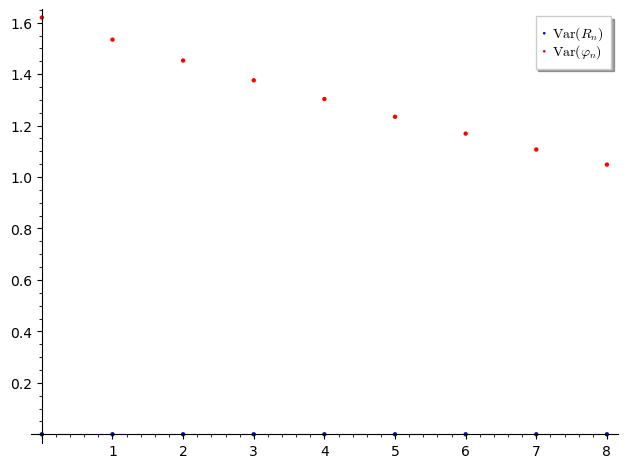

In [ ]:
# Assuming previous numerics were correct, we have rate
N = 1000
Rn_rate = -0.917; var_phi_nj_rate = -1.153
varphi_nj = [e^(var_phi_nj_rate * n) for n in range(N)]
varphi_n = [((3^(n+1) - 3) / 2) * varphi_nj[n] for n in range(N)]
varRn = [e^(Rn_rate * n) for n in range(N)]

# only select out the last 10?
l10VRn = varRn[-10:-1]
l10Vphin = varphi_n[-10:-1]

p1 = list_plot(l10VRn, legend_label=r'$\operatorname{Var}(R_n)$')
p2 = list_plot(l10Vphin, legend_label=r'$\operatorname{Var}(\varphi_n)$', color='red')

(p1 + p2)

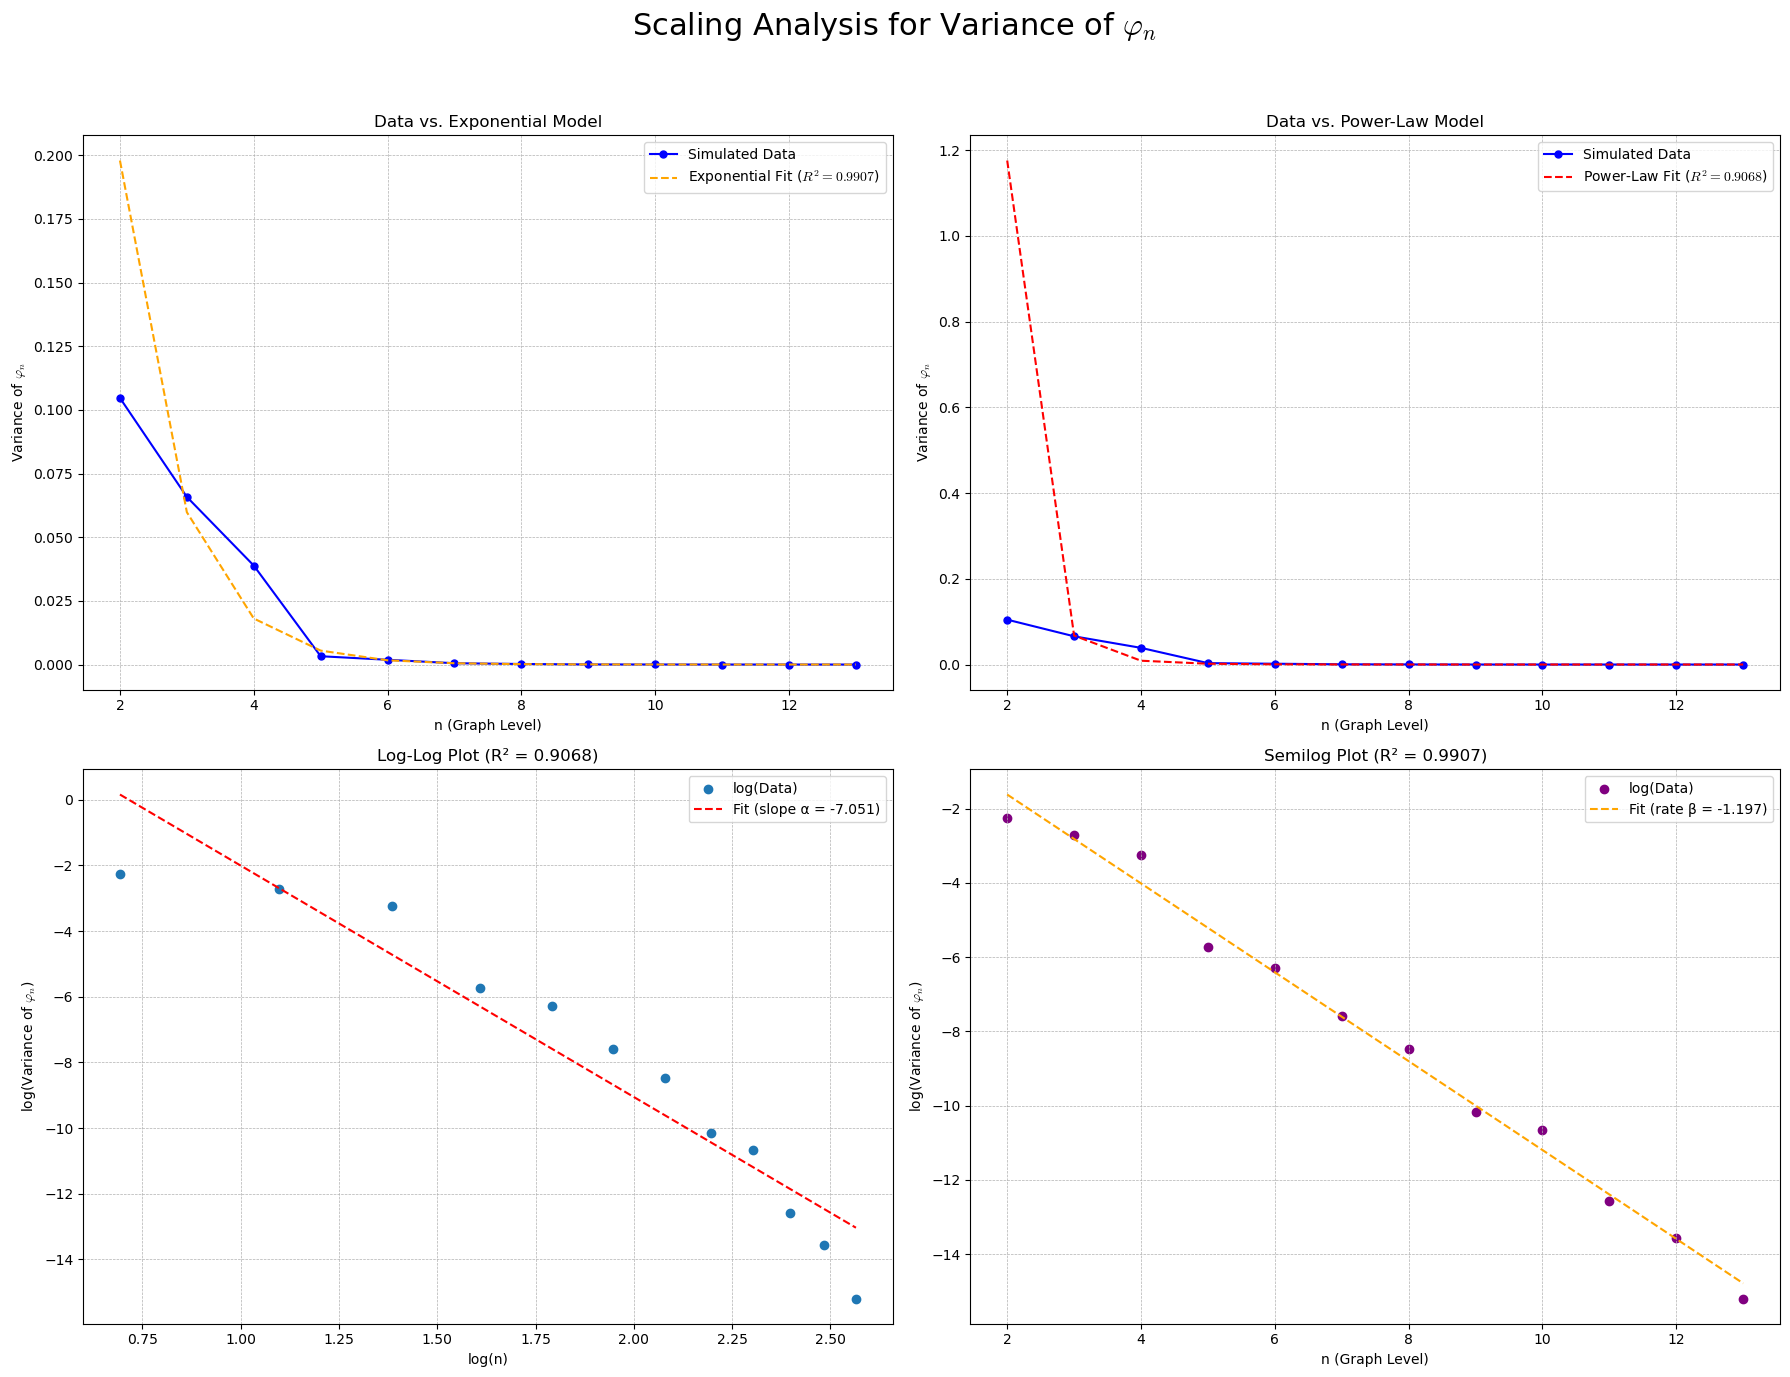

In [ ]:
# Use stat plotting from previous usage
n_values = np.arange(2, n+1)
analyze_statistic_scaling(n_values, statistic_values = var_mids, statistic_name=r"Variance of $\varphi_n$")

In [ ]:
Vphi_n = [((3^(n+1) - 3) / 2) * var_mids[n] for n in n_values] 
